In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from typing import Literal

In [ ]:
#TODO
# PCA iris
# LDA iris
# TSNE 
# UMAP

### PCA


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

iris = datasets.load_iris()
x_iris = sc.fit_transform(iris.data)
y_iris = iris.target

print(x_iris.shape)

In [ ]:

# SVD

def plot_2d(type: Literal['umap', 'svd', 'pca', 'tsne', 'lda'], x, y=y_iris):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel(f'{type.upper()} Component 1')
    plt.ylabel(f'{type.upper()} Component 2')
    plt.title(f'{type.upper()} - Iris Dataset')
    plt.show()
    

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca.fit(x_iris)

print(pca.explained_variance_ratio_)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_iris_pca = pca.transform(x_iris)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_iris_pca[:, 0], x_iris_pca[:, 1], x_iris_pca[:, 2], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

In [ ]:
pca2d = PCA(n_components=2)
x_iris_pca2d = pca2d.fit_transform(x_iris)

plot_2d('pca', x_iris_pca2d)


### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_iris_lda2d = lda.fit_transform(x_iris, y_iris)

In [ ]:
# Create a scatter plot of the reduced dataset
plot_2d('lda', x_iris_lda2d)


### TSNE


In [ ]:
from sklearn.manifold import TSNE

tsne3d = TSNE(n_components=3)
tsne2d = TSNE(n_components=2)

x_iris_tsne3d = tsne3d.fit_transform(x_iris)
x_iris_tsne2d = tsne2d.fit_transform(x_iris)

In [ ]:

plot_2d('tsne', x_iris_tsne2d)

### UMAP


In [ ]:
from umap import UMAP

umap = UMAP(n_components=2, n_neighbors=15, metric='euclidean' )
x_iris_umap2d = umap.fit_transform(x_iris)

In [ ]:
plot_2d('umap', x_iris_umap2d)

In [28]:
from sklearn.decomposition import TruncatedSVD

svd2d = TruncatedSVD(n_components=2)
x_iris_svd2d = svd2d.fit_transform(x_iris)

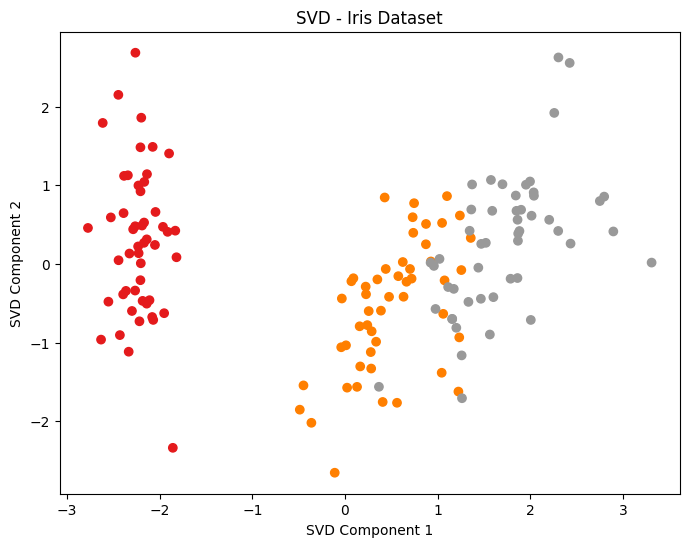

In [29]:
plot_2d('svd', x_iris_svd2d)